Loading data from multiple years...

Loading file: /Users/hannahkurzweil/Desktop/Coding/ds4e/idaho/daily_aqi_by_county_1990.csv
Successfully processed data for 1990
Number of records: 1169
Counties included: ['Ada', 'Bannock', 'Blaine', 'Bonner', 'Bonneville', 'Caribou', 'Clearwater', 'Kootenai', 'Lemhi', 'Nez Perce', 'Shoshone', 'Twin Falls']
Columns in processed data: ['State Name', 'County Name', 'State Code', 'County Code', 'Date', 'AQI', 'Category', 'Defining Parameter', 'Defining Site', 'Number Of Sites Reporting', 'Year', 'Month', 'Season']
Successfully added 1990 data

Loading file: /Users/hannahkurzweil/Desktop/Coding/ds4e/idaho/daily_aqi_by_county_2000.csv
Successfully processed data for 2000
Number of records: 3752
Counties included: ['Ada', 'Bannock', 'Benewah', 'Bingham', 'Bonner', 'Bonneville', 'Boundary', 'Butte', 'Canyon', 'Caribou', 'Custer', 'Kootenai', 'Lemhi', 'Lewis', 'Minidoka', 'Nez Perce', 'Power', 'Shoshone', 'Twin Falls']
Columns in processed data: ['State Nam

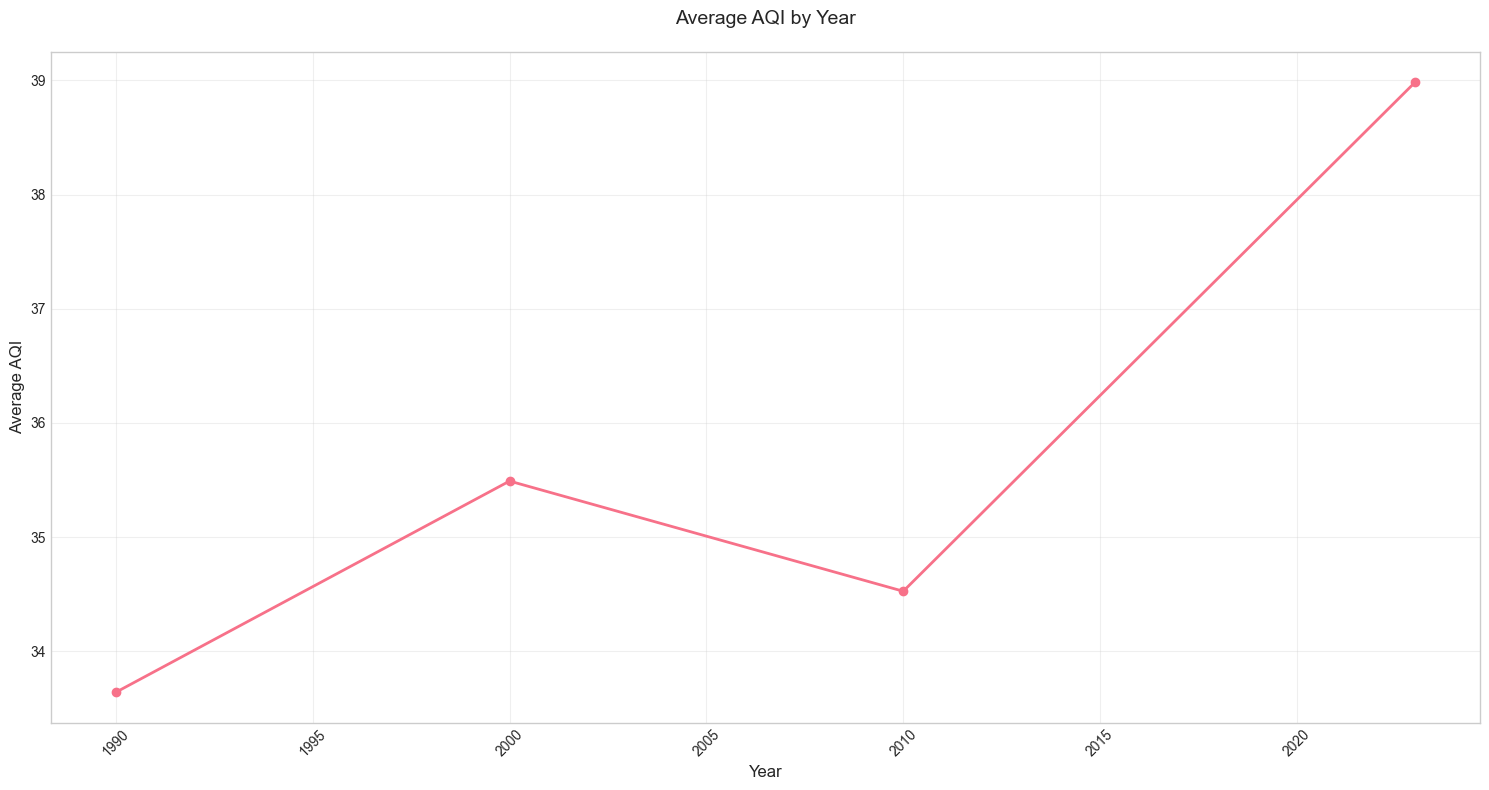

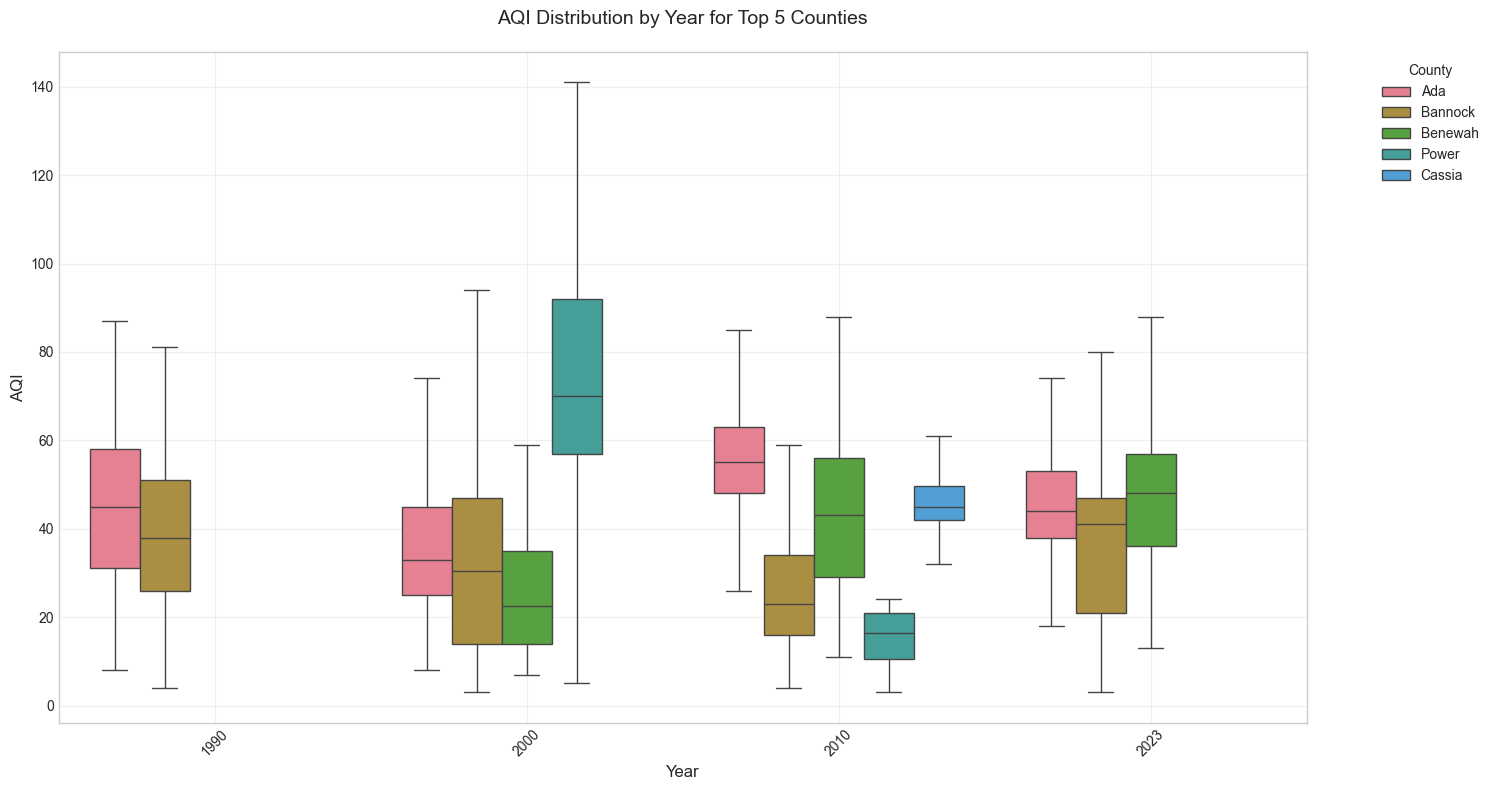

<Figure size 1500x800 with 0 Axes>

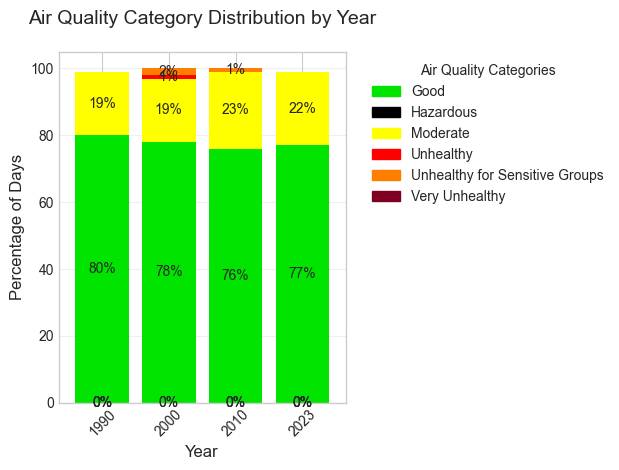

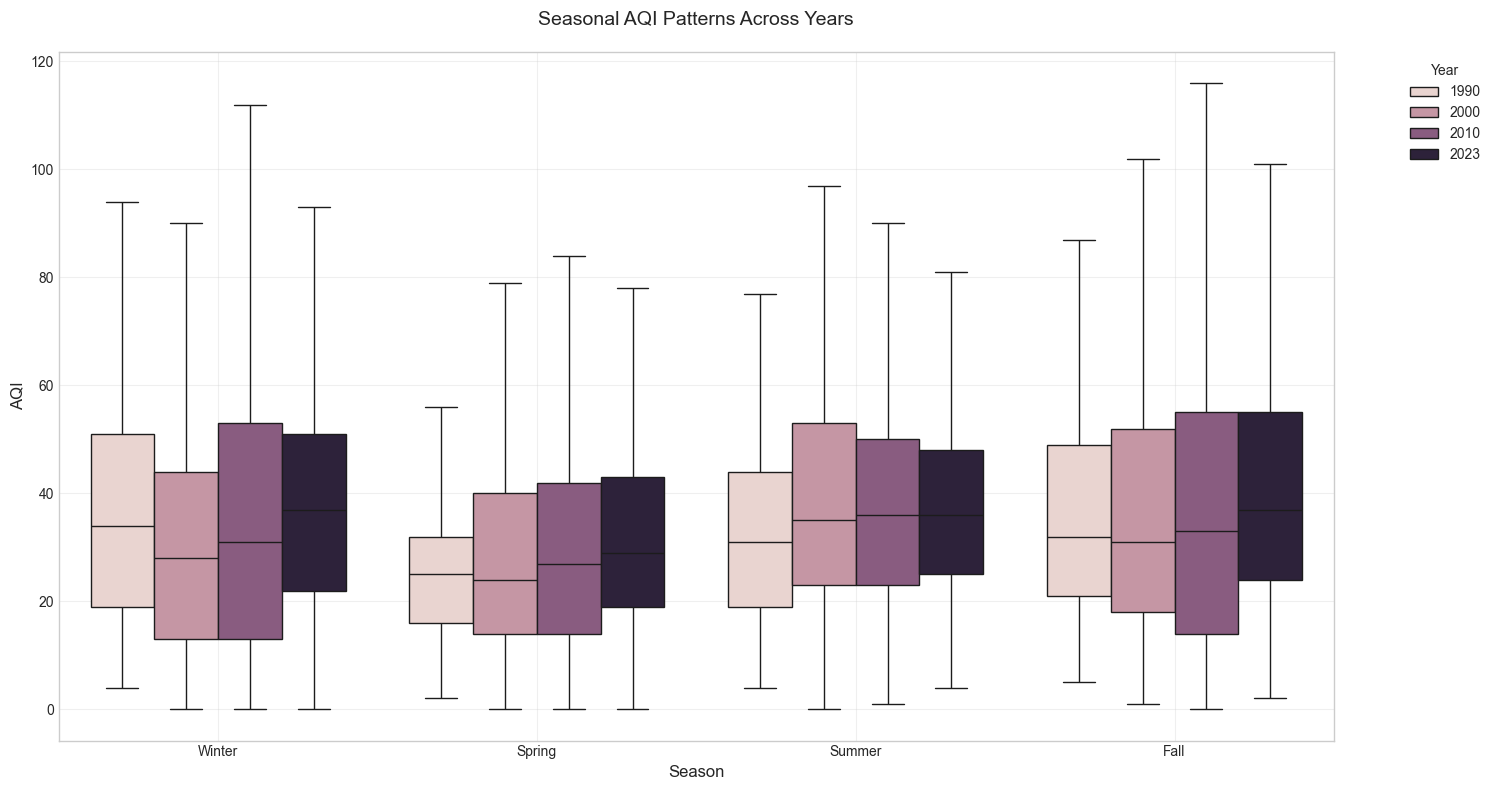

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Set style for better-looking graphs
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def load_single_year(file_path):
    """
    Load and process a single year of AQI data
    """
    print(f"\nLoading file: {file_path}")
    
    try:
        # Read the CSV file with low_memory=False to handle mixed data types
        df = pd.read_csv(file_path, low_memory=False)
        
        # Filter for Idaho first (using original column names)
        idaho_data = df[df['State Name'] == 'Idaho'].copy()
        
        if len(idaho_data) == 0:
            print(f"Warning: No Idaho data found in {file_path}")
            return None
            
        # Standardize column names with special handling for AQI
        columns = idaho_data.columns.str.strip().str.title()
        # Replace 'Aqi' with 'AQI' specifically
        columns = [col if col != 'Aqi' else 'AQI' for col in columns]
        idaho_data.columns = columns
        
        # Convert date string to datetime
        idaho_data['Date'] = pd.to_datetime(idaho_data['Date'])
        
        # Add year column for easy filtering
        idaho_data['Year'] = idaho_data['Date'].dt.year
        
        # Add month column for seasonal analysis
        idaho_data['Month'] = idaho_data['Date'].dt.month
        
        # Add season column
        idaho_data['Season'] = pd.cut(idaho_data['Month'], 
                                     bins=[0, 3, 6, 9, 12],
                                     labels=['Winter', 'Spring', 'Summer', 'Fall'])
        
        print(f"Successfully processed data for {idaho_data['Year'].iloc[0]}")
        print(f"Number of records: {len(idaho_data)}")
        print(f"Counties included: {sorted(idaho_data['County Name'].unique())}")
        print(f"Columns in processed data: {idaho_data.columns.tolist()}")
        
        return idaho_data
        
    except Exception as e:
        print(f"Error processing data: {str(e)}")
        print("Current column names:", df.columns.tolist())
        return None

def load_multiple_years(base_path="~/Desktop/Coding/ds4e/idaho", years=[1990, 2000, 2010, 2023]):
    """
    Load AQI data from multiple years and combine into one dataset
    """
    # Expand the tilde in the path to the home directory
    base_path = os.path.expanduser(base_path)
    
    all_data = []
    
    for year in years:
        file_name = f"daily_aqi_by_county_{year}.csv"
        file_path = os.path.join(base_path, file_name)
        
        try:
            year_data = load_single_year(file_path)
            if year_data is not None and not year_data.empty:
                all_data.append(year_data)
                print(f"Successfully added {year} data")
        except FileNotFoundError:
            print(f"Warning: Could not find data file for {year}")
        except Exception as e:
            print(f"Error processing {year} data: {str(e)}")
    
    if not all_data:
        raise ValueError("No data was successfully loaded")
    
    # Combine all years into one DataFrame
    combined_data = pd.concat(all_data, ignore_index=True)
    
    print("\nData loading complete!")
    print(f"Total records: {len(combined_data)}")
    print(f"Years included: {sorted(combined_data['Year'].unique())}")
    print(f"Counties included: {sorted(combined_data['County Name'].unique())}")
    
    return combined_data

def explore_data(df):
    """
    Basic data exploration with real EPA data structure
    """
    print("\n--- DATA EXPLORATION ---")
    
    print("\nDataset Overview:")
    print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
    print(f"Years covered: {sorted(df['Year'].unique())}")
    print(f"Idaho counties included: {sorted(df['County Name'].unique())}")
    
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nData summary:")
    print(df.describe())
    
    print("\nMissing values:")
    print(df.isnull().sum())

def analyze_trends(df):
    """
    Analyze trends across years and create comparisons
    """
    print("\n--- TREND ANALYSIS ---")
    
    try:
        # Verify AQI column exists
        if 'AQI' not in df.columns:
            print("Available columns:", df.columns.tolist())
            raise ValueError(f"Column not found: AQI")
        
        # Yearly averages
        yearly_avg = df.groupby('Year')['AQI'].agg(['mean', 'max', 'min']).round(2)
        print("\nYearly AQI Statistics:")
        print(yearly_avg)
        
        # County comparisons
        county_stats = df.groupby(['Year', 'County Name'])['AQI'].mean().round(2)
        print("\nAverage AQI by County and Year:")
        print(county_stats)
        
        # Category distribution by year
        category_dist = pd.crosstab(df['Year'], df['Category'])
        print("\nAQI Category Distribution by Year:")
        print(category_dist)
        
        return yearly_avg, county_stats, category_dist
    
    except Exception as e:
        print(f"Error in trend analysis: {str(e)}")
        print("Current column names:", df.columns.tolist())
        raise

def demonstrate_data_moves(df):
    """
    Example data manipulations with real EPA data
    """
    print("\n--- DATA MANIPULATION EXAMPLES ---")
    
    try:
        # Verify AQI column exists
        if 'AQI' not in df.columns:
            raise ValueError(f"Column not found: AQI")
        
        # 1. Filter for specific conditions
        print("\nDays with Unhealthy Air Quality by Year:")
        unhealthy_days = df[df['AQI'] > 100].groupby('Year').size()
        print(unhealthy_days)
        
        # 2. Summer months comparison
        print("\nAverage Summer AQI by Year:")
        summer_aqi = df[df['Season'] == 'Summer'].groupby('Year')['AQI'].mean()
        print(summer_aqi.round(2))
        
        # 3. Worst air quality days
        print("\nWorst Air Quality Days for Each Year:")
        worst_days = df.loc[df.groupby('Year')['AQI'].idxmax()]
        print(worst_days[['Year', 'Date', 'County Name', 'AQI', 'Category']])
        
        # 4. County rankings
        print("\nCounties with Highest Average AQI:")
        county_ranking = df.groupby('County Name')['AQI'].mean().sort_values(ascending=False)
        print(county_ranking.round(2))
        
    except Exception as e:
        print(f"Error in data manipulation: {str(e)}")
        print("Current column names:", df.columns.tolist())

def create_visualizations(df):
    """
    Create visualizations comparing AQI across years
    """
    print("\n--- CREATING VISUALIZATIONS ---")
    
    try:
        # Verify AQI column exists
        if 'AQI' not in df.columns:
            raise ValueError(f"Column not found: AQI")
        
        # 1. Yearly Trends - Average AQI by Year
        plt.figure(figsize=(15, 8))
        yearly_avg = df.groupby('Year')['AQI'].mean()
        plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2)
        plt.title('Average AQI by Year', fontsize=14, pad=20)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average AQI', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # 2. County Comparisons - without outlier points
        plt.figure(figsize=(15, 8))
        # Get the top 5 counties by average AQI
        top_counties = (df.groupby('County Name')['AQI']
                       .mean()
                       .sort_values(ascending=False)
                       .head(5)
                       .index)
        # Filter for just these counties
        county_data = df[df['County Name'].isin(top_counties)]
        # showfliers=False removes the outlier points
        sns.boxplot(data=county_data, x='Year', y='AQI', hue='County Name', showfliers=False)
        plt.title('AQI Distribution by Year for Top 5 Counties', fontsize=14, pad=20)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('AQI', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # 3. Category Distribution with whole number percentages
        plt.figure(figsize=(15, 8))
        category_counts = df.groupby(['Year', 'Category']).size().unstack()
        # Calculate percentages and round to whole numbers
        category_pcts = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
        category_pcts = category_pcts.round(0)  # Round to whole numbers
        
        # Define EPA AQI category colors
        category_colors = {
            'Good': '#00e400',          # Bright green
            'Moderate': '#ffff00',      # Yellow
            'Unhealthy for Sensitive Groups': '#ff7e00',  # Orange
            'Unhealthy': '#ff0000',     # Red
            'Very Unhealthy': '#7e0023', # Maroon
            'Hazardous': '#000000'      # Black
        }
        
        # Get the colors in the same order as the categories
        colors = [category_colors.get(cat, '#808080') for cat in category_pcts.columns]
        
        ax = category_pcts.plot(
            kind='bar', 
            stacked=True,
            color=colors,
            width=0.8
        )
        
        plt.title('Air Quality Category Distribution by Year', fontsize=14, pad=20)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Percentage of Days', fontsize=12)
        
        # Customize legend
        handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
        plt.legend(
            handles,
            category_pcts.columns,
            title='Air Quality Categories',
            bbox_to_anchor=(1.05, 1),
            loc='upper left'
        )
        
        # Add grid but only on y-axis
        plt.grid(axis='y', alpha=0.3)
        plt.xticks(rotation=45)
        
        # Add percentage labels on the bars (now in whole numbers)
        for c in ax.containers:
            # Add labels only for segments > 3% for clarity
            ax.bar_label(c, fmt='%.0f%%', label_type='center')
            
        plt.tight_layout()
        plt.show()
        
        # 4. Season Comparison
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df, x='Season', y='AQI', hue='Year', showfliers=False)  # Also removing outliers here
        plt.title('Seasonal AQI Patterns Across Years', fontsize=14, pad=20)
        plt.xlabel('Season', fontsize=12)
        plt.ylabel('AQI', fontsize=12)
        plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in visualizations: {str(e)}")
        print("Current column names:", df.columns.tolist())
        
def analyze_2023_data(df):
    """
    Create focused visualizations for 2023 Idaho AQI data
    """
    # Filter for 2023 data
    df_2023 = df[df['Year'] == 2023].copy()
    
    try:
        # 1. Monthly AQI Pattern for 2023
        plt.figure(figsize=(15, 8))
        monthly_avg = df_2023.groupby('Month')['AQI'].mean()
        # Create month labels
        month_names = {
            1: 'January', 2: 'February', 3: 'March', 4: 'April', 
            5: 'May', 6: 'June', 7: 'July', 8: 'August',
            9: 'September', 10: 'October', 11: 'November', 12: 'December'
        }
        monthly_avg.index = [month_names[m] for m in monthly_avg.index]
        
        plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')
        plt.title('Average AQI by Month in 2023', fontsize=14, pad=20)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Average AQI', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 2. County Comparison (Heat Calendar)
        plt.figure(figsize=(15, 10))
        county_daily = df_2023.pivot_table(
            index='County Name', 
            columns=df_2023['Date'].dt.strftime('%Y-%m'),
            values='AQI',
            aggfunc='mean'
        ).round(1)
        
        sns.heatmap(county_daily, cmap='YlOrRd', 
                   annot=True, fmt='.0f', 
                   center=50, vmin=0, vmax=100)
        plt.title('Monthly Average AQI by County in 2023', fontsize=14, pad=20)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('County', fontsize=12)
        plt.tight_layout()
        plt.show()

        # 3. Daily AQI Categories Distribution by County
        plt.figure(figsize=(15, 8))
        county_categories = pd.crosstab(
            df_2023['County Name'], 
            df_2023['Category'], 
            normalize='index'
        ) * 100

        # Define EPA AQI category colors
        category_colors = {
            'Good': '#00e400',          # Bright green
            'Moderate': '#ffff00',      # Yellow
            'Unhealthy for Sensitive Groups': '#ff7e00',  # Orange
            'Unhealthy': '#ff0000',     # Red
            'Very Unhealthy': '#7e0023', # Maroon
            'Hazardous': '#000000'      # Black
        }
        
        colors = [category_colors.get(cat, '#808080') for cat in county_categories.columns]
        
        county_categories.plot(
            kind='barh', 
            stacked=True,
            color=colors,
            width=0.8
        )
        plt.title('Air Quality Category Distribution by County (2023)', fontsize=14)
        plt.xlabel('Percentage of Days', fontsize=12)
        plt.ylabel('County', fontsize=12)
        plt.legend(title='Air Quality Categories', bbox_to_anchor=(1.05, 1))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 4. Worst Air Quality Days
        worst_days = df_2023[df_2023['AQI'] >= df_2023['AQI'].quantile(0.95)]
        plt.figure(figsize=(15, 8))
        sns.scatterplot(data=worst_days, 
                       x='Date', 
                       y='AQI',
                       hue='County Name',
                       size='AQI',
                       sizes=(100, 400),
                       alpha=0.6)
        plt.title('Worst Air Quality Days in 2023', fontsize=14, pad=20)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('AQI', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(title='County', bbox_to_anchor=(1.05, 1))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in 2023 analysis: {str(e)}")
        print("Available columns:", df_2023.columns.tolist())

# Add some statistical summaries
def summarize_2023(df):
    """
    Print key findings about 2023 AQI data
    """
    df_2023 = df[df['Year'] == 2023]
    
    print("\n--- 2023 AQI SUMMARY ---")
    print(f"\nTotal days monitored: {len(df_2023)}")
    print(f"Number of counties monitored: {df_2023['County Name'].nunique()}")
    
    print("\nWorst air quality day:")
    worst_day = df_2023.loc[df_2023['AQI'].idxmax()]
    print(f"Date: {worst_day['Date'].strftime('%B %d, %2023')}")
    print(f"County: {worst_day['County Name']}")
    print(f"AQI: {worst_day['AQI']}")
    print(f"Category: {worst_day['Category']}")
    
    print("\nCounty with most unhealthy days:")
    unhealthy_days = df_2023[df_2023['AQI'] > 100].groupby('County Name').size()
    worst_county = unhealthy_days.idxmax()
    print(f"{worst_county}: {unhealthy_days[worst_county]} days")
        
def main():
    try:
        # Load data using your specific path
        print("Loading data from multiple years...")
        df = load_multiple_years("~/Desktop/Coding/ds4e/idaho")
        
        # Verify column names after loading
        print("\nVerifying column names:")
        print(df.columns.tolist())
        
        # Explore the combined dataset
        explore_data(df)
        
        # Analyze trends
        yearly_avg, county_stats, category_dist = analyze_trends(df)
        
        # Show example data manipulations
        demonstrate_data_moves(df)
        
        # Create visualizations
        create_visualizations(df)
        
    except Exception as e:
        print(f"An error occurred during analysis: {str(e)}")
        print("Please check that all files exist and are properly formatted")

if __name__ == "__main__":
    main()